In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


pd.set_option('display.max_columns',None)

In [4]:
df= pd.read_csv('movierecommendation.csv',sep='\t',names=['user_id','item_id','rating','timestamp'])
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [11]:
df.shape

(100003, 4)

In [8]:
len(df.user_id.unique())

944

In [19]:
movie_title = pd.read_csv('Movie_titles.csv')
movie_title.head(10)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [25]:
df= pd.merge(df,movie_title,on='item_id')
df.head()
df.drop('title_x',axis=1,inplace=True)

In [26]:
df

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [29]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

In [30]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [32]:
rating = pd.DataFrame(df.groupby('title')['rating'].mean())
rating

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [35]:
rating['sum_of_ratings'] = df.groupby('title')['rating'].count()
rating

,rating,sum_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


Text(0.5, 0, 'number of ratings')

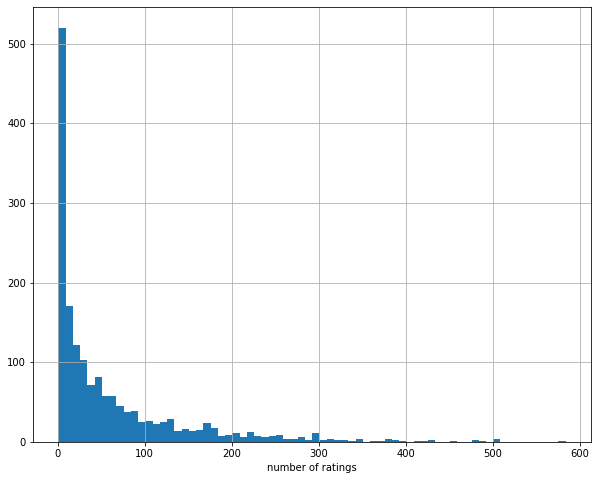

In [44]:
plt.figure(figsize=(10,8))
rating['sum_of_ratings'].hist(bins=70)
plt.xlabel('number of ratings')

No handles with labels found to put in legend.


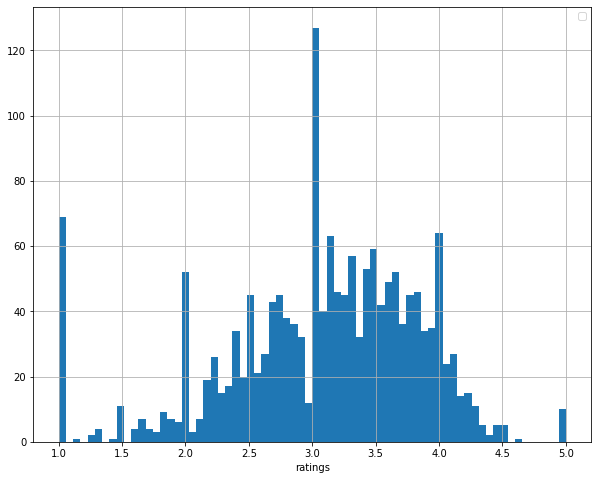

In [47]:
plt.figure(figsize=(10,8))
rating['rating'].hist(bins=70)
plt.xlabel('ratings')

In [53]:
movie_pivot = df.pivot_table(index = 'user_id',columns='title',values='rating')
movie_pivot.head(10)

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
0                              NaN           NaN                    NaN   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   
5                              NaN           NaN                    2.0   
6                              NaN           NaN                    NaN   
7                              NaN           NaN                    NaN   
8                              NaN           NaN                    NaN   
9                              NaN           NaN                    NaN   

title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                 
0                        NaN         NaN                          NaN   
1                        5.0         NaN                          NaN   
2                        NaN         NaN                          NaN   
3                        NaN         2.0                          NaN   
4                        NaN         NaN                          NaN   
5                        NaN         NaN                          NaN   
6                        4.0         NaN                          NaN   
7                        4.0         NaN                          NaN   
8                        NaN         NaN                          NaN   
9                        NaN         NaN                          NaN   

title    20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
user_id                                                                      
0                                        NaN                           NaN   
1                                        3.0                           4.0   
2                                        NaN                           NaN   
3                                        NaN                           NaN   
4                                        NaN                           NaN   
5                                        NaN                           4.0   
6                                        NaN                           5.0   
7                                        5.0                           5.0   
8                                        NaN                           NaN   
9                                        NaN                           NaN   

title    3 Ninjas: High Noon At Mega Mountain (1998)  39 Steps, The (1935)  \
user_id                                                                      
0                                                NaN                   NaN   
1                                                NaN                   NaN   
2                                                1.0                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   
5                                                NaN                   NaN   
6                                                NaN                   NaN   
7                                                NaN                   4.0   
8                                                NaN                   NaN   
9                                                NaN                   4.0   

title    8 1/2 (1963)  8 Heads in a Duffel Bag (1997)  8 Seconds (1994)  \
user_id                                                                   
0                 NaN                             NaN               NaN   
1                 NaN                             NaN               NaN   
2                 NaN                           

In [55]:
rating.sort_values('sum_of_ratings',ascending = False)

,rating,sum_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [59]:
star_wars = movie_pivot['Star Wars (1977)']
star_wars

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [62]:
similar_to_star_wars = movie_pivot.corrwith(star_wars)
similar_to_star_wars.sort_values(ascending=False).head(10)

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
No Escape (1994)                        1.0
Man of the Year (1995)                  1.0
Hollow Reed (1996)                      1.0
Commandments (1997)                     1.0
Cosi (1996)                             1.0
Stripes (1981)                          1.0
Star Wars (1977)                        1.0
Golden Earrings (1947)                  1.0
Mondo (1996)                            1.0
Line King: Al Hirschfeld, The (1996)    1.0
dtype: float64

In [68]:
corr_star_war =pd.DataFrame(similar_to_star_wars,columns=['Correlation'])
corr_star_war.sort_values('Correlation',ascending=False).head(20) 

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [82]:
corr_star_war = corr_star_war.join(rating['sum_of_ratings'])
corr_star_war

,Correlation,sum_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41
Zeus and Roxanne (1997),0.818182,6


In [81]:
corr_star_war[corr_star_war['sum_of_ratings']>100].sort_values('Correlation').head(30)

,Correlation,sum_of_ratings
title,,
"First Wives Club, The (1996)",-0.194496,160
G.I. Jane (1997),-0.176734,175
Crash (1996),-0.148507,128
As Good As It Gets (1997),-0.130466,112
"Edge, The (1997)",-0.127167,113
Kiss the Girls (1997),-0.122186,143
Little Women (1994),-0.121053,102
In the Name of the Father (1993),-0.119390,102
"Remains of the Day, The (1993)",-0.112067,150


## Top 10 recommended movies Based on star wars

In [88]:
corr_star_war[corr_star_war['sum_of_ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,sum_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115
